# Electric Vehicles Market Size Analysis using Python

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [4]:
print(data.head(5))

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [9]:
data["Model Year"].values

array([2020, 2023, 2019, ..., 2021, 2021, 2021], dtype=int64)

In [10]:
ev_year=data["Model Year"].value_counts().sort_index()

In [11]:
ev_year

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nisik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


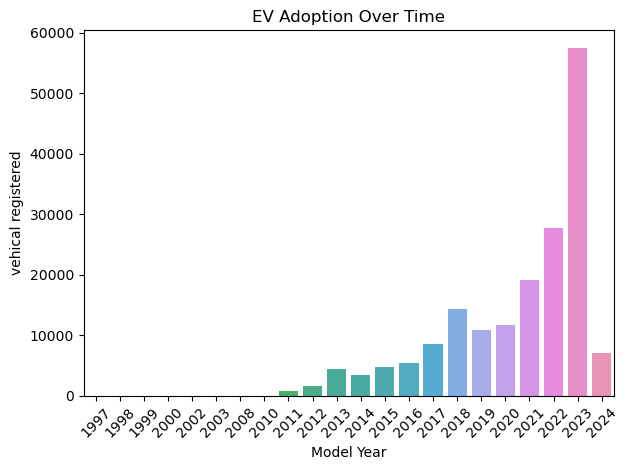

In [13]:
sns.barplot(ev_year.index,ev_year)
plt.xticks(rotation=45)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel("vehical registered")
plt.tight_layout()
plt.show()

In [14]:
county=data["County"].value_counts()

In [15]:
top_county=county.head(3)

In [16]:
print(top_county)

King         92740
Snohomish    21001
Pierce       13782
Name: County, dtype: int64


In [17]:
mask = data["County"].apply(lambda x: x in top_county)
top_counties_data = data[mask]

In [18]:
ev_city_dist_top_county=top_counties_data.groupby(["County",'City']).size().sort_values(ascending=False).reset_index(name="Number of Vehicles")

In [19]:
top_cities=ev_city_dist_top_county.head(10)

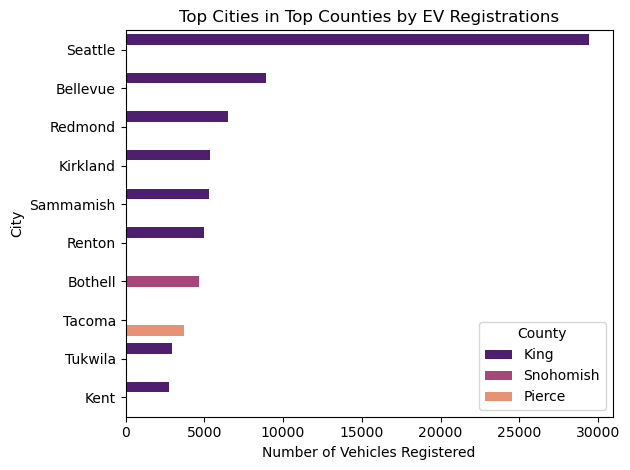

In [20]:

sns.barplot(x="Number of Vehicles",y="City",hue="County",data=top_cities,palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

In [21]:
ev_type=data["Electric Vehicle Type"].value_counts()

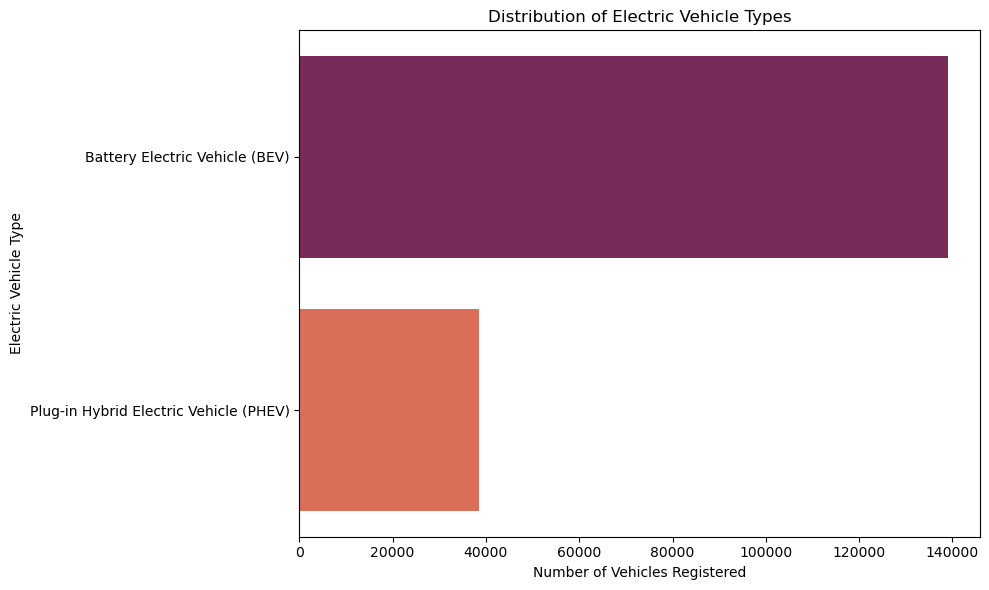

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type, y=ev_type.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

In [23]:
top_ev_make=data["Make"].value_counts().head(10)

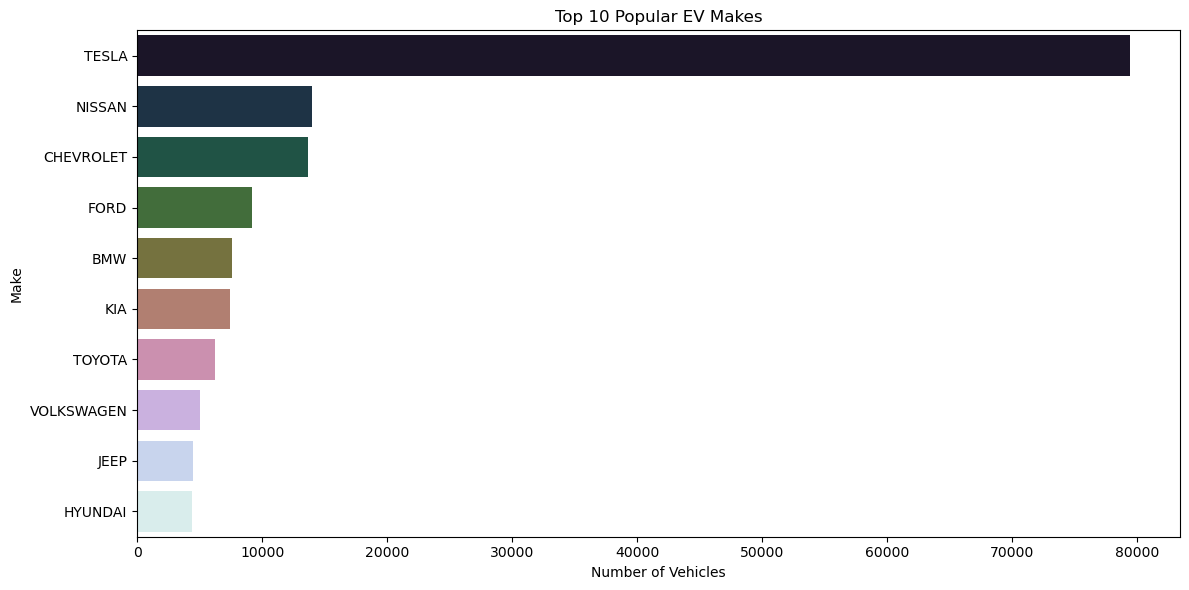

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ev_make, y=top_ev_make.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [25]:
top3_ev_make=top_ev_make.head(3).index

In [26]:
top3_make_data=data[data["Make"].isin(top3_ev_make)]

In [27]:
model_top3_make=top3_make_data.groupby(["Make","Model"]).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [28]:
top_models=model_top3_make.head(10)

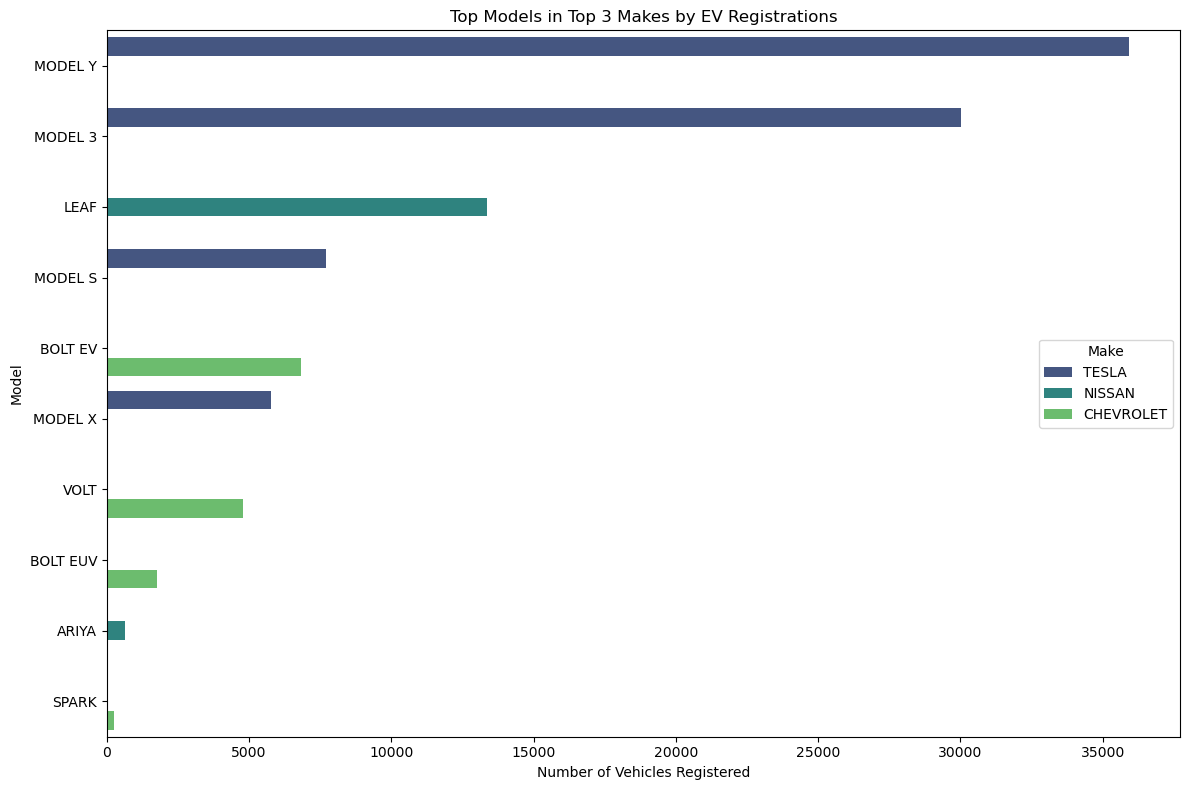

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

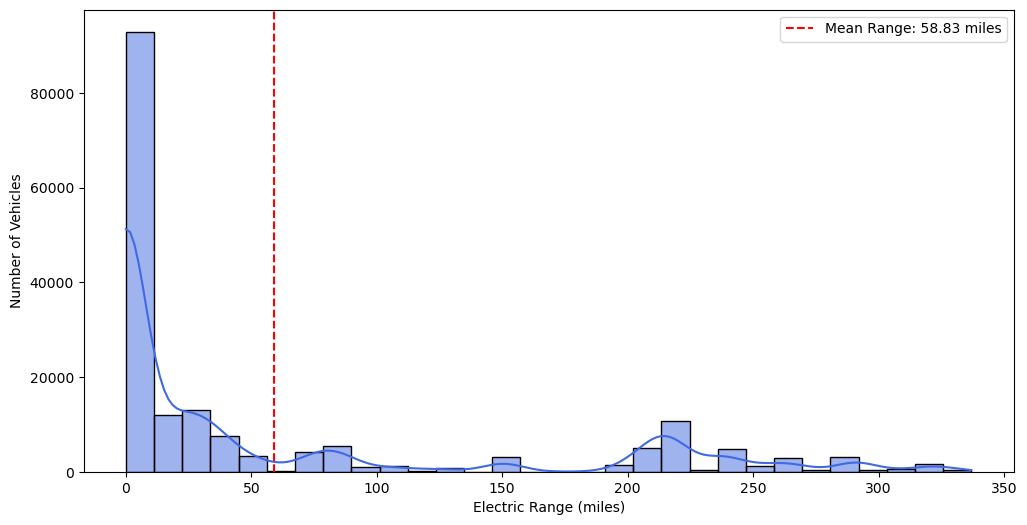

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Electric Range'],bins=30,kde=True,color="royalblue")
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

In [39]:
avg_range_year=data.groupby("Model Year")["Electric Range"].mean().reset_index()

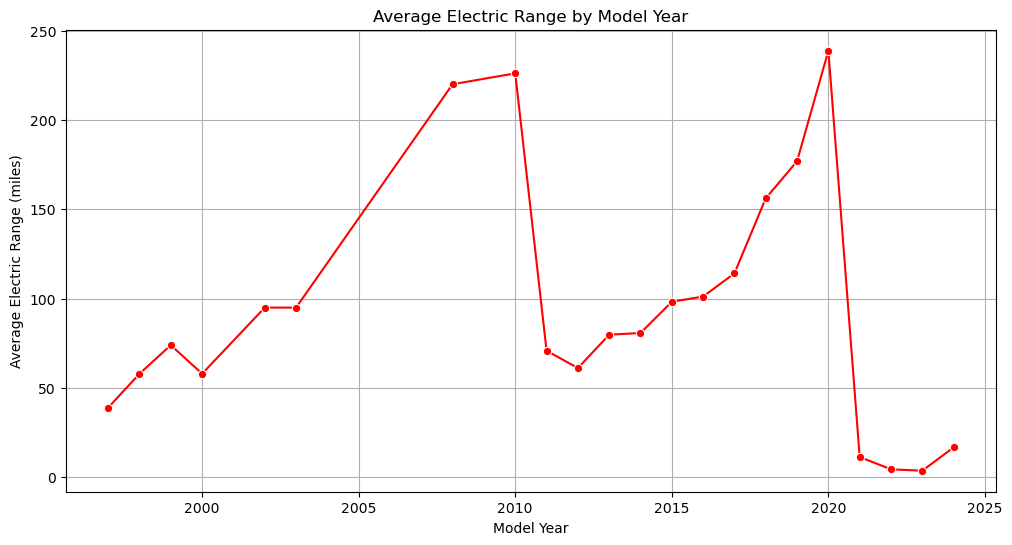

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=avg_range_year, marker='o', color='red')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

In [59]:
# Merge model_top3_make with data on common columns
merged_data = pd.merge(model_top3_make, data[['Make', 'Model', 'Electric Range']], on=['Make', 'Model'], how='inner')

# Calculate average electric range for each model within the top three makes
avg_range_model = merged_data.groupby(["Make", "Model"])["Electric Range"].mean().sort_values(ascending=False).reset_index()


In [62]:
top_range_model=avg_range_model.head(10)

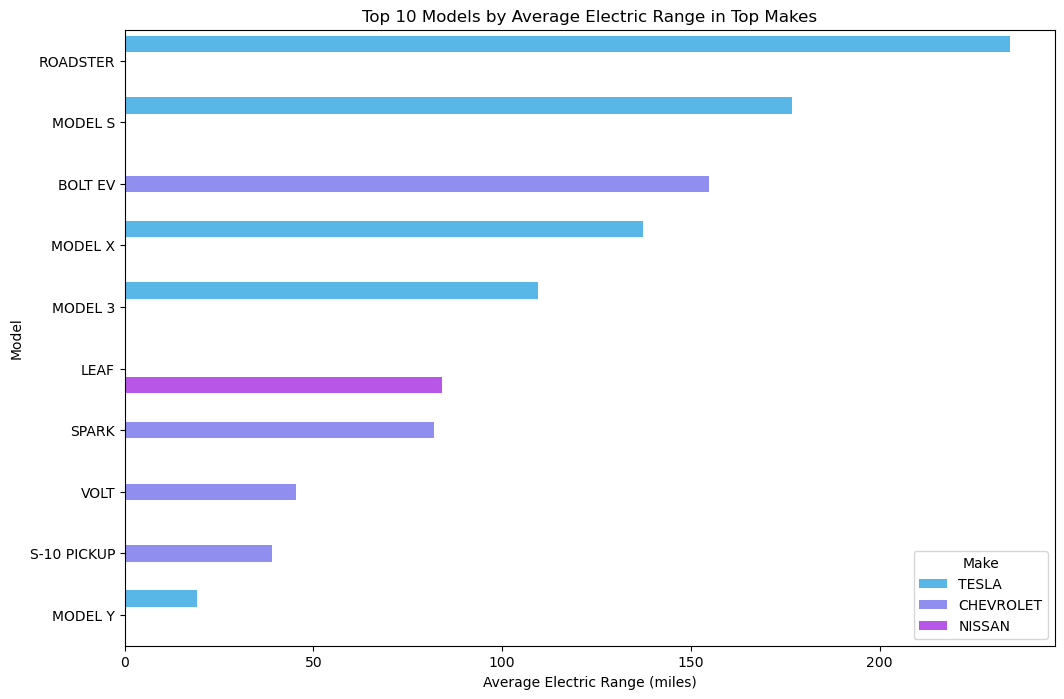

In [67]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_model, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='best')
plt.show()

In [69]:
import numpy as np
from scipy.optimize import curve_fit

In [76]:
ev_reg_count=data["Model Year"].value_counts().sort_index()

In [85]:
filtered_years=ev_reg_count[ev_reg_count.index<=2023]
filtered_years

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
Name: Model Year, dtype: int64

In [79]:
def exp_growth(x, a, b):
    return a * np.exp(b * x)

In [80]:
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

In [89]:
params, covariance = curve_fit(exp_growth, x_data, y_data)

In [94]:
forecast_years=np.arange(2024,2024+6)-filtered_years.index.min()
forecasted_values=exp_growth(forecast_years,*params)

In [97]:
forecasted_evs=dict(zip(forecast_years+filtered_years.index.min(),forecasted_values))

In [98]:
forecasted_evs

{2024: 79079.20808938889,
 2025: 119653.96274428742,
 2026: 181047.22020265696,
 2027: 273940.74706208805,
 2028: 414497.01805382164,
 2029: 627171.3128407666}

In [99]:
years=np.arange(filtered_years.index.min(),2029+1)
actual_years=filtered_years.index
forecast_years=np.arange(2024,2029+1)

In [107]:
actual_values=filtered_years.values
forecasted_values_full=[forecasted_evs[year]for year in forecast_years]

In [108]:
forecasted_values_full

[79079.20808938889,
 119653.96274428742,
 181047.22020265696,
 273940.74706208805,
 414497.01805382164,
 627171.3128407666]

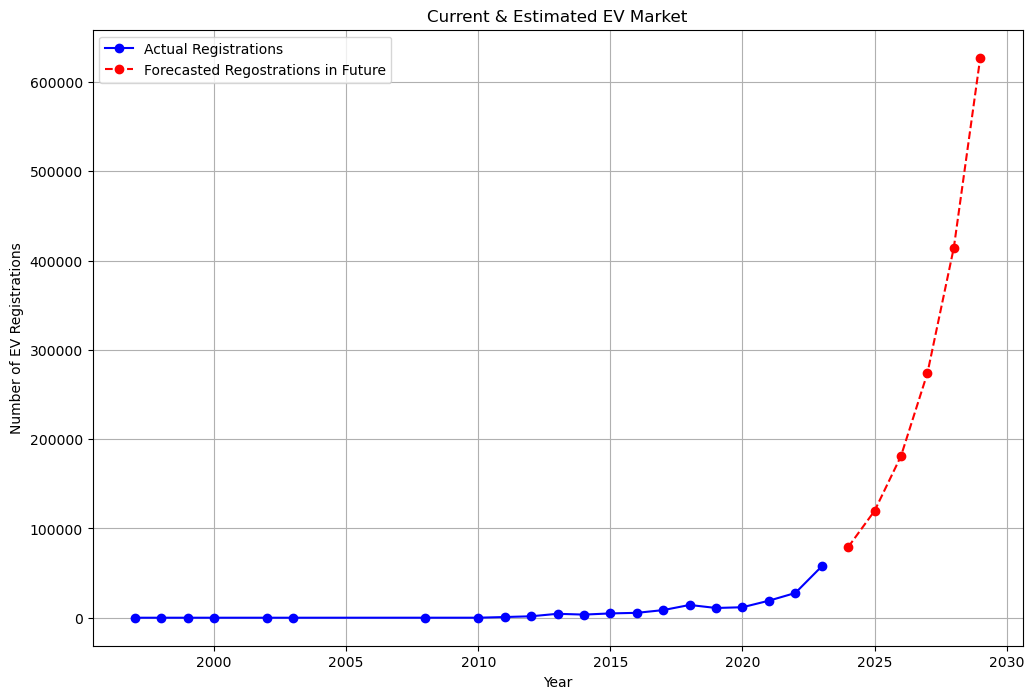

In [114]:
plt.figure(figsize=(12,8))
plt.plot(actual_years,actual_values,'bo-',label="Actual Registrations")
plt.plot(forecast_years,forecasted_values,"ro--",label="Forecasted Regostrations in Future")

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()